## PCA and clusteriong with K-Means

In [186]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import imageio as imio

Get data and pre processing

In [59]:
images_inception_features = './pre-processing/training_inception_features_array.npy'
training_image_labels_array = './pre-processing/training_image_labels_array.npy'
training_image_names_array = './pre-processing/training_image_names_array.npy'
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array,allow_pickle=True)
training_set_dict['label'] = np.load(training_image_labels_array,allow_pickle=True)
training_set_dict['features'] = np.load(images_inception_features,allow_pickle=True)

features= training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

Normalize data and encode y values

In [131]:
x_values = StandardScaler().fit_transform(features)
y_values = LabelEncoder().fit_transform(labels)

Instead PCA object from sklearn

In [132]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_values)

Put components into Data Frame

In [133]:
components = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

Functions will be used to select number of cluster

In [197]:
def plot_results(inertials):
    x, y = zip(*[inertia for inertia in inertials])
    plt.plot(x, y, 'ro-', markersize=8, lw=2)
    plt.grid(True)
    plt.xlabel('Num Clusters')
    plt.ylabel('Inertia')
    plt.show()


def select_clusters(dataset, loops):
    inertia_clusters = list()

    for i in range(1, loops + 1, 1):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(dataset)
        inertia_clusters.append([i, kmeans.inertia_])

    plot_results(inertia_clusters)

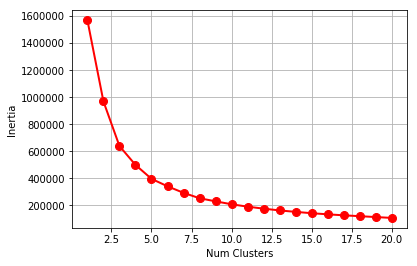

In [198]:
select_clusters(components,20)

Apparently the best value for k is 3

In [199]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(components)

Plot center clusters and scatter of two components

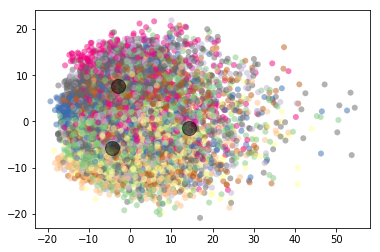

In [200]:
plt.scatter(components["principal component 1"], components["principal component 2"],
            c=y_values, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.5)

## Conclusions

We're going to see the most popular dogs in each cluster

In [218]:
clusters = pd.DataFrame()
clusters['label'] = labels
clusters['cluster'] = kmeans.labels_

In [219]:
clusters.loc[clusters["cluster"]==0]["label"].value_counts()

maltese_dog                    106
shih-tzu                       102
japanese_spaniel                98
australian_terrier              97
cairn                           90
tibetan_terrier                 89
papillon                        89
dandie_dinmont                  88
silky_terrier                   88
pomeranian                      88
lhasa                           86
lakeland_terrier                84
samoyed                         82
sealyham_terrier                82
norfolk_terrier                 80
border_terrier                  76
west_highland_white_terrier     74
keeshond                        74
norwich_terrier                 73
scotch_terrier                  72
pembroke                        70
affenpinscher                   69
toy_poodle                      69
yorkshire_terrier               69
miniature_schnauzer             66
chow                            66
miniature_pinscher              65
toy_terrier                     64
pekinese            

In [214]:
def printImages(name1,name2,name3):
    img = imio.imread(name1)
    img2 = imio.imread(name2)
    img3 = imio.imread(name3)

    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.subplot(1,3,2)
    plt.imshow(img2)
    plt.subplot(1,3,3)
    plt.imshow(img3)

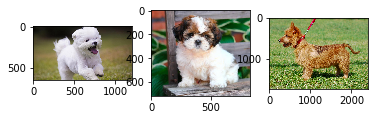

In [215]:
printImages('./data/train/maltese.jpg','./data/train/shihtzu.jpg','./data/train/australian_terrier.jpg')

Those dogs are small, they are similar

In [220]:
clusters.loc[clusters["cluster"]==1]["label"].value_counts()

kelpie                            54
basenji                           52
italian_greyhound                 51
chesapeake_bay_retriever          51
great_pyrenees                    51
rhodesian_ridgeback               48
irish_wolfhound                   48
labrador_retriever                46
whippet                           42
pug                               42
redbone                           38
great_dane                        36
american_staffordshire_terrier    34
chihuahua                         34
siberian_husky                    33
malinois                          32
newfoundland                      32
dingo                             32
beagle                            31
staffordshire_bullterrier         30
boston_bull                       29
irish_terrier                     29
golden_retriever                  28
mexican_hairless                  28
flat-coated_retriever             27
scottish_deerhound                27
miniature_pinscher                27
n

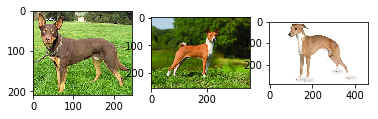

In [222]:
printImages('./data/train/kelpie.jpg','./data/train/basenji.jpg','./data/train/italian_greyhound.jpg')

This dogs are thin and tall

In [221]:
clusters.loc[clusters["cluster"]==2]["label"].value_counts()

entlebucher                       112
bernese_mountain_dog              106
afghan_hound                      102
scottish_deerhound                 94
leonberg                           88
bedlington_terrier                 78
saluki                             78
english_foxhound                   76
bloodhound                         75
welsh_springer_spaniel             74
irish_water_spaniel                74
clumber                            74
beagle                             73
sussex_spaniel                     72
saint_bernard                      72
gordon_setter                      71
airedale                           71
greater_swiss_mountain_dog         71
irish_setter                       69
black-and-tan_coonhound            68
basset                             67
collie                             66
bluetick                           65
african_hunting_dog                65
curly-coated_retriever             65
malamute                           64
english_spri

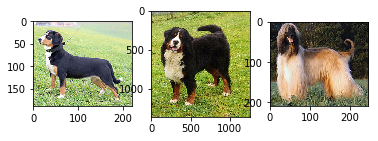

In [223]:
printImages('./data/train/entlebucher.jpg','./data/train/bernese_mountain_dog.jpg','./data/train/afghan_hound.jpg')

Dogs with black, white and brown color